# Adding null component to SuSiE

Here we evaluate the possible benefit adding a null component to SuSiE. The hope is that the CS will be easier to prune (without using purity) and that the pruned CS can achieve smaller FDR.

## A simple simulation case

In [2]:
set.seed(1)
n = 500
p = 1000
b = rep(0,p)
b[200] = 1
b[800] = 1
X = matrix(rnorm(n*p),nrow=n,ncol=p)
X[,200] = X[,400]
X[,600] = X[,800]
y = X %*% b + rnorm(n)

In [3]:
diag_susie = function(purity = 0, dedup = F, ...) {
    s = susieR::susie(X, y, L=5, scaled_prior_variance=0.2, track_fit=F, coverage=NULL, ...)
    sets = susieR::susie_get_CS(s, X=cbind(X,0), coverage=0.95,min_abs_corr=purity,dedup=dedup)
    str(sets$cs)
    print('PIP for the null (1st PIP) and causal (other PIPs)')
    pip = susieR::susie_get_PIP(s, sets$cs_index)
    print(pip[c(ncol(X)+1,200,400,600,800)])
    s$sets= sets
    s$pip = pip
    return(s)
}

run_susie = function(purity = 0.1, dedup = T, ...) {
    diag_susie(purity=purity, dedup=dedup, ...)
}

### Run SuSiE in "diagnostics" mode

"Diagnostics" means that we set no purity threshold and remove no duplicate CS. The PIP computation will be based on the un-processed result.

First, fit with SuSiE as is, but over-specifiy $L$ and report all CS obtained (setting `min_abs_corr` to zero)

In [4]:
s = diag_susie()

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L3: int [1:876] 1 2 4 5 6 8 9 10 11 12 ...
 $ L4: int [1:876] 1 2 4 5 6 8 9 10 11 12 ...
 $ L5: int [1:877] 1 2 4 5 6 8 9 10 11 12 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1]        NA 0.5006026 0.5006026 0.5006017 0.5006017


So the 3rd and 4th CS are large. Now add a penalty to null,

In [5]:
s = diag_susie(null_weight=0.005)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L4: int [1:872] 1 2 4 5 6 8 9 10 11 12 ...
 $ L5: int [1:873] 1 2 4 5 6 8 9 10 11 12 ...
 $ L3: int [1:871] 1 2 4 5 6 8 9 10 11 12 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.1008317 0.5005786 0.5005786 0.5005777 0.5005777


As expected the CS got slightly narrower, and the PIP for the null is larger than $1/p$ (0.001 in this case). Now I increase the penalty,

In [6]:
s = diag_susie(null_weight=0.01)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L5: int [1:868] 1 2 4 5 6 8 9 10 11 12 ...
 $ L4: int [1:867] 1 2 4 5 6 8 9 10 11 12 ...
 $ L3: int [1:866] 1 2 4 5 6 8 9 10 11 12 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.1886082 0.5005565 0.5005565 0.5005557 0.5005557


In [7]:
s = diag_susie(null_weight=0.05)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L3: int [1:822] 1 2 4 5 6 8 9 10 11 12 ...
 $ L5: int [1:828] 1 2 4 5 6 8 9 10 11 12 ...
 $ L4: int [1:825] 1 2 4 5 6 8 9 10 11 12 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.6041899 0.5004224 0.5004224 0.5004218 0.5004218


In [8]:
s = diag_susie(null_weight=0.1)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L5: int [1:772] 2 4 5 6 8 9 10 11 12 13 ...
 $ L3: int [1:768] 2 4 5 6 8 9 10 11 12 13 ...
 $ L4: int [1:769] 2 4 5 6 8 9 10 11 12 13 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.8101352 0.5003204 0.5003204 0.5003199 0.5003199


In [9]:
s = diag_susie(null_weight=0.2)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L3: int [1:647] 2 5 6 8 10 11 12 13 14 15 ...
 $ L5: int [1:648] 2 5 6 8 10 11 12 13 14 15 ...
 $ L4: int [1:647] 2 5 6 8 10 11 12 13 14 15 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9419801 0.5002054 0.5002054 0.5002052 0.5002052


In [10]:
s = diag_susie(null_weight=0.3)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L3: int [1:501] 5 8 10 11 13 14 15 16 17 18 ...
 $ L4: int [1:502] 5 8 10 11 13 14 15 16 17 18 ...
 $ L5: int [1:506] 5 8 10 11 13 14 15 16 17 18 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9782793 0.5001411 0.5001411 0.5001409 0.5001409


In [11]:
s = diag_susie(null_weight=0.4)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L4: int [1:340] 8 10 11 13 14 23 25 26 31 32 ...
 $ L5: int [1:342] 8 10 11 13 14 23 25 26 31 32 ...
 $ L3: int [1:339] 8 10 11 13 14 23 25 26 31 32 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9914398 0.5001001 0.5001001 0.5001000 0.5001000


In [12]:
s = diag_susie(null_weight=0.5)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L5: int [1:179] 8 10 25 31 32 33 36 37 38 45 ...
 $ L3: int [1:179] 8 10 25 31 32 33 36 37 38 45 ...
 $ L4: int [1:179] 8 10 25 31 32 33 36 37 38 45 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9966153 0.5000713 0.5000713 0.5000713 0.5000713


In [13]:
s = diag_susie(null_weight=0.6)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L3: int [1:52] 8 36 63 90 112 173 246 248 339 352 ...
 $ L4: int [1:52] 8 36 63 90 112 173 246 248 339 352 ...
 $ L5: int [1:52] 8 36 63 90 112 173 246 248 339 352 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9987379 0.5000499 0.5000499 0.5000499 0.5000499


In [14]:
s = diag_susie(null_weight=0.7)

List of 5
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
 $ L3: int [1:4] 112 768 954 1001
 $ L4: int [1:4] 112 768 954 1001
 $ L5: int [1:4] 112 768 954 1001
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9995926 0.5000333 0.5000333 0.5000333 0.5000333


In [15]:
s = diag_susie(null_weight=0.8)

List of 5
 $ L2: int [1:2] 600 800
 $ L3: int 1001
 $ L4: int 1001
 $ L5: int 1001
 $ L1: int [1:2] 200 400
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9999042 0.5000200 0.5000200 0.5000200 0.5000200


In [16]:
s = diag_susie(null_weight=0.98)

List of 5
 $ L2: int [1:2] 600 800
 $ L3: int 1001
 $ L4: int 1001
 $ L5: int 1001
 $ L1: int [1:2] 200 400
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9999999 0.5000017 0.5000017 0.5000017 0.5000017


### Run SuSiE in default mode

Here we set purity threshold to 0.1 and remove duplicate CS.

In [17]:
s = run_susie()

List of 2
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1]  NA 0.5 0.5 0.5 0.5


In this example the default SuSiE with purity filter is good enough. No need to bother with a penalty.

In [18]:
s = run_susie(null_weight=0.7)

List of 2
 $ L2: int [1:2] 600 800
 $ L1: int [1:2] 200 400
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.0 0.5 0.5 0.5 0.5


In [19]:
s = run_susie(null_weight=0.75)

List of 3
 $ L2: int [1:2] 600 800
 $ L4: int [1:2] 954 1001
 $ L1: int [1:2] 200 400
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 0.9405439 0.5000088 0.5000088 0.5000088 0.5000088


At least from this example, we will get stuck to a null set only when `null_weight` is very high.

## A null simulation

We simulate random data,

In [20]:
set.seed(1)
n = 500
p = 1000
X = matrix(rnorm(n*p),nrow=n,ncol=p)
y = rnorm(n)

and run SuSiE with / without purity filter:

In [21]:
s = diag_susie()

List of 5
 $ L5: int [1:887] 1 2 4 5 6 8 9 10 11 12 ...
 $ L4: int [1:887] 1 2 4 5 6 8 9 10 11 12 ...
 $ L2: int [1:887] 1 2 4 5 6 8 9 10 11 12 ...
 $ L3: int [1:887] 1 2 4 5 6 8 9 10 11 12 ...
 $ L1: int [1:887] 1 2 4 5 6 8 9 10 11 12 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1]          NA 0.002444137 0.007357031 0.002841289 0.002235344


In [22]:
s = run_susie()

 NULL
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1]          NA 0.002444137 0.007357031 0.002841289 0.002235344


For this simple case, the purity filter itself is good enough to tell between signal and noise.

## A case demonstrating the usefulness of penalty

I took this data-set from our simulation. This is a case SuSiE makes false discovery in multi-signal setting.

In [36]:
%cd ../dsc/susie_comparison

/project/mstephens/SuSiE/mvarbvs/dsc/susie_comparison


In [24]:
dat = readRDS('lm_less/liter_data_4_summarize_ld_1_lm_less_3.rds')$data

In [25]:
r=1
fitted = susieR::susie(dat$X, dat$Y[,r], L=5,
               estimate_residual_variance=TRUE, 
               scaled_prior_variance=0.1,
               tol=1e-3, track_fit=TRUE)

In [26]:
b = dat$true_coef[,r]
b[which(b!=0)] = 1

The data is noisy,

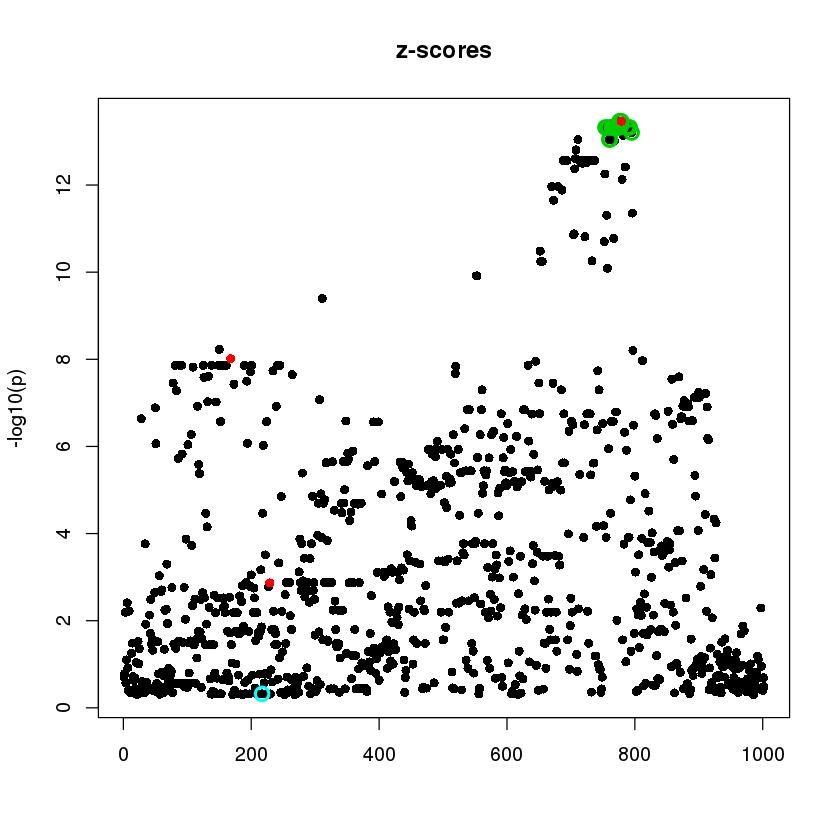

In [27]:
susieR::susie_plot(fitted, y='z', b=b, main = paste('z-scores'))

and SuSiE confidently makes a mistake,

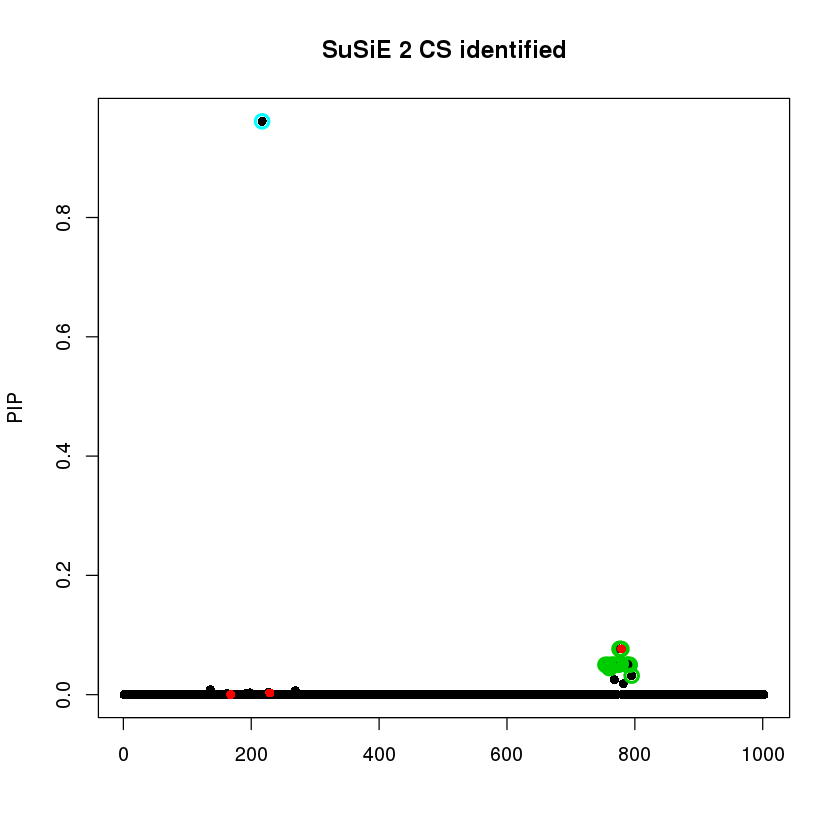

In [28]:
susieR::susie_plot(fitted, y='PIP', b=b, max_cs=0.4, main = paste('SuSiE', length(fitted$sets$cs), 'CS identified'))

Now let's run SuSiE with penalty 0.05,

In [29]:
X=dat$X
y=dat$Y[,r]
s = run_susie(null_weight=0.05)
s$sets$purity

List of 2
 $ L3: int 217
 $ L1: int [1:18] 754 758 760 761 764 765 769 773 774 775 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 1.842970e-14 9.605425e-04 0.000000e+00 8.219857e-07 7.058920e-09


,min.abs.corr,mean.abs.corr,median.abs.corr
L3,1.000000,1.0000000,1.0000000
L1,0.997991,0.9994118,0.9995046


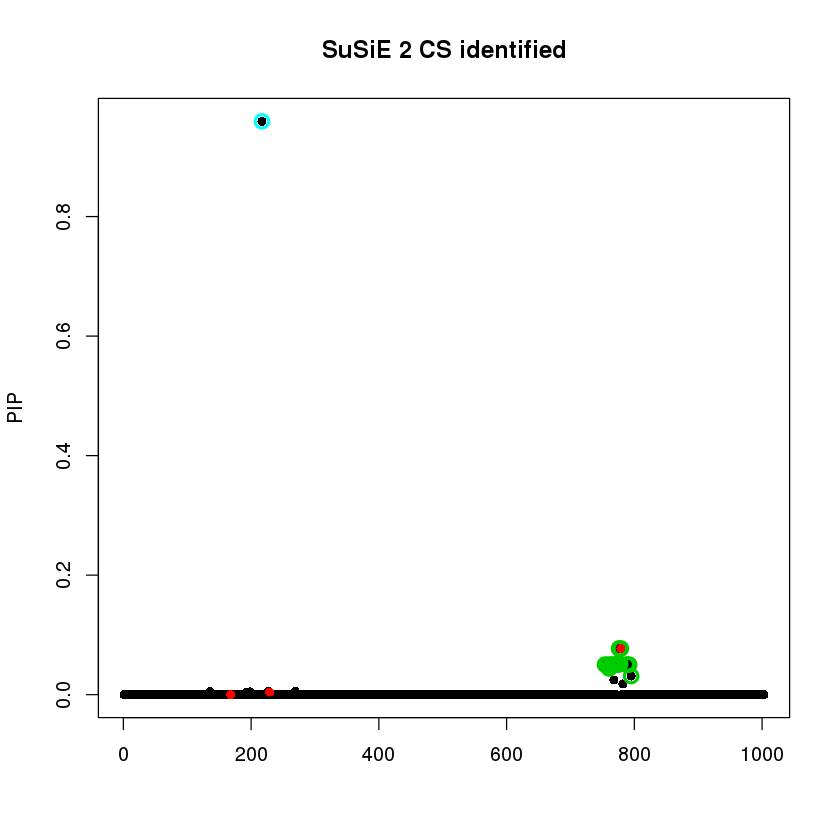

In [30]:
susieR::susie_plot(s, y='PIP', b=b, max_cs=0.1, main = paste('SuSiE', length(fitted$sets$cs), 'CS identified'))

It is not helping. Now try with 0.1,

In [31]:
s = run_susie(null_weight=0.1)
s$sets$purity

List of 2
 $ L1: int [1:18] 754 758 760 761 764 765 769 773 774 775 ...
 $ L3: int [1:4] 198 217 227 229
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 5.273559e-14 2.151633e-03 0.000000e+00 1.700868e-06 1.298258e-08


,min.abs.corr,mean.abs.corr,median.abs.corr
L1,0.9979910,0.9994118,0.9995046
L3,0.7748409,0.9108958,0.9811653


The signal is now in the CS, but very small PIP.

Now try it with 0.12,

In [32]:
s = run_susie(null_weight=0.15)
s$sets$purity

List of 2
 $ L1: int [1:20] 754 758 760 761 764 765 768 769 773 774 ...
 $ L2: int [1:23] 253 317 330 458 477 480 487 498 512 524 ...
[1] "PIP for the null (1st PIP) and causal (other PIPs)"
[1] 1.781649e-03 6.315924e-05 8.749880e-07 5.999980e-06 2.985338e-06


,min.abs.corr,mean.abs.corr,median.abs.corr
L1,0.9949778,0.9989818,0.9990075
L2,0.5690032,0.8849180,0.9015019


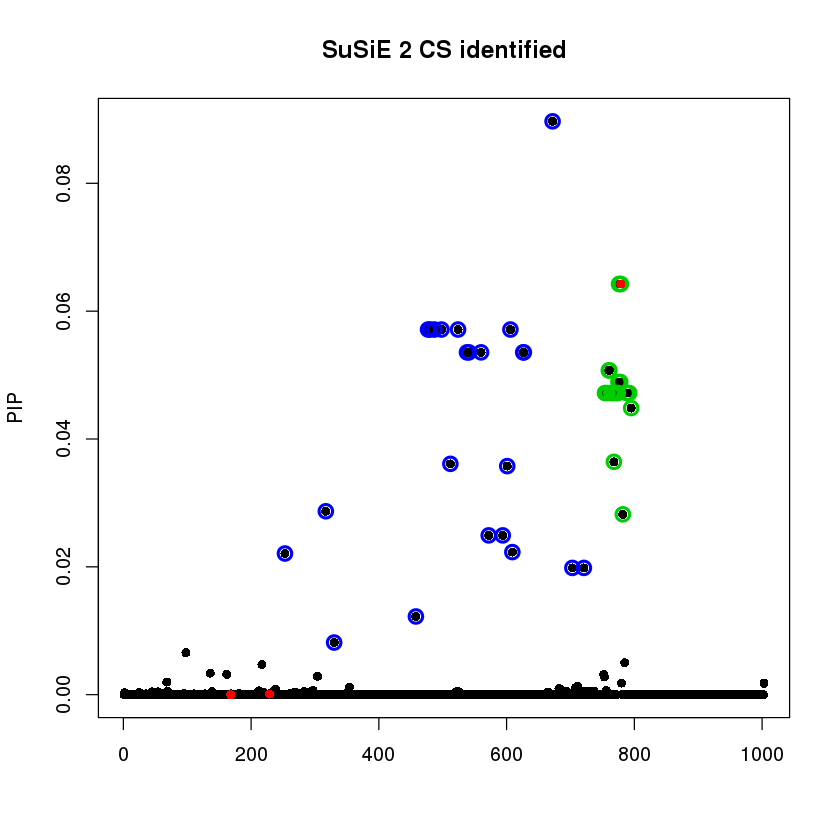

In [33]:
susieR::susie_plot(s, y='PIP', b=b, max_cs=0.1, main = paste('SuSiE', length(fitted$sets$cs), 'CS identified'))

## Another real data example

In [37]:
dat = readRDS('lm_less/liter_data_12_summarize_ld_1_lm_less_3.rds')$data

In [38]:
r=1
fitted = susieR::susie(dat$X, dat$Y[,r], L=5,
               estimate_residual_variance=TRUE, 
               scaled_prior_variance=0.1,
               tol=1e-3, track_fit=TRUE)

In [39]:
b = dat$true_coef[,r]
b[which(b!=0)] = 1

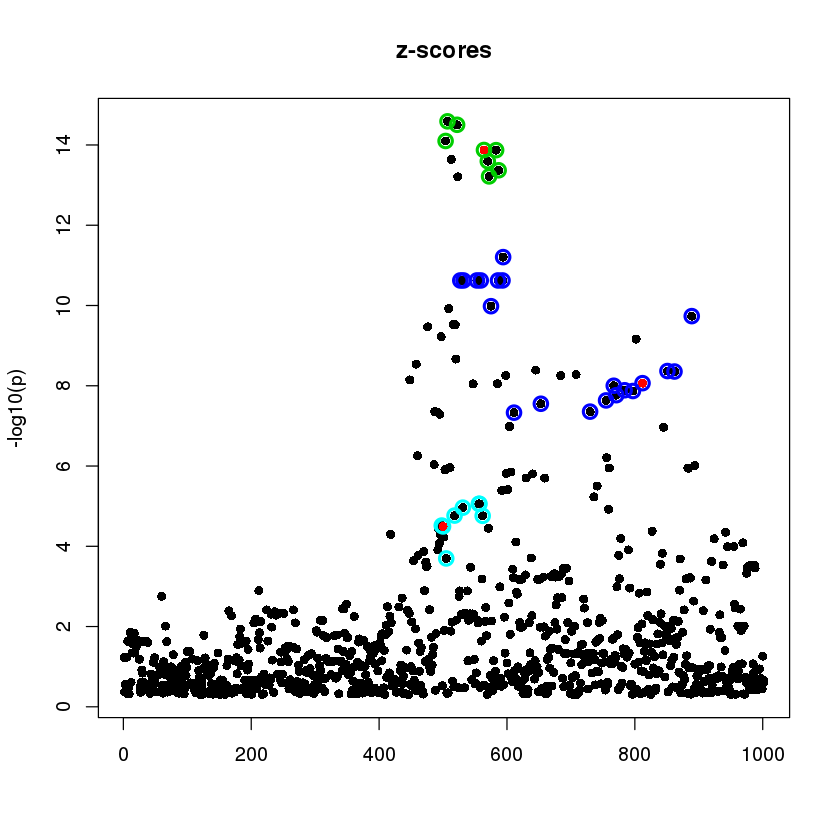

In [40]:
susieR::susie_plot(fitted, y='z', b=b, main = paste('z-scores'))

It seems fine. But previous result,

In [44]:
s = readRDS("fit_susie/liter_data_12_summarize_ld_1_lm_less_3_fit_susie_6.rds")$fitted[[r]]

In [47]:
sets = susieR::susie_get_CS(s, X=dat$X, coverage=0.95,min_abs_corr=0.1)
pip = susieR::susie_get_PIP(s, sets$cs_index)
s$sets= sets
s$pip = pip

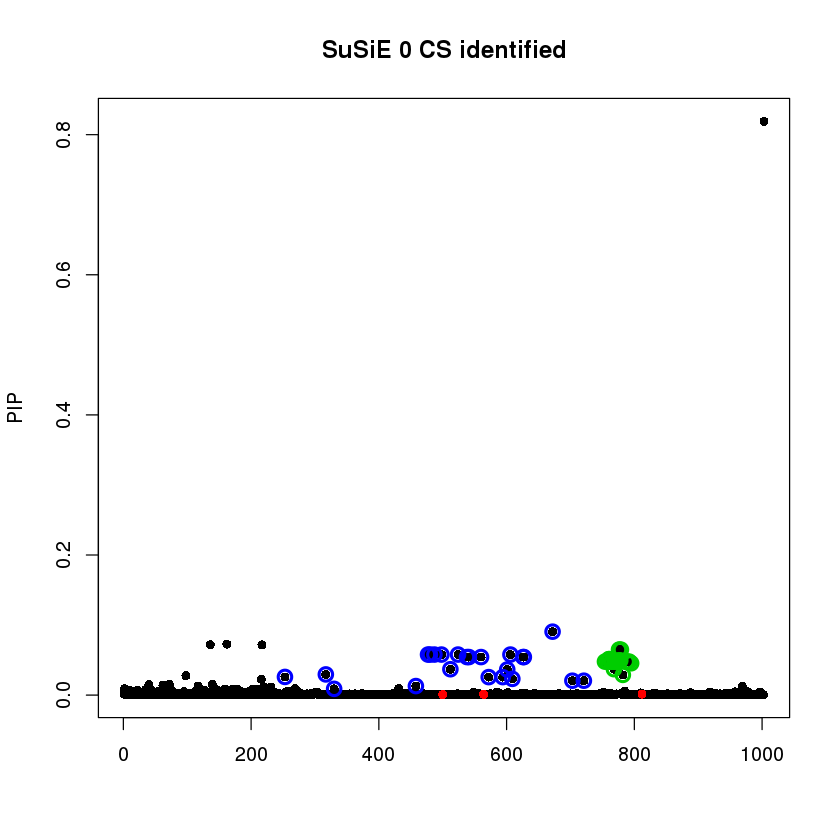

In [50]:
susieR::susie_plot(s, y='PIP', b=b, main = paste('SuSiE', length(fitted$sets$cs), 'CS identified'))

In [53]:
print(readRDS("fit_susie/liter_data_12_summarize_ld_1_lm_less_3_fit_susie_6.rds")$DSC_DEBUG$script)

[1] "## r script UUID: 86257949\nlibrary(susieR)\nDSC_1BF7CD6A <- list()\nDSC_1BF7CD6A <- dscrutils::load_inputs(c('susie_comparison/lm_less/liter_data_12_summarize_ld_1_lm_less_3.pkl'), dscrutils::read_dsc)\nDSC_REPLICATE <- DSC_1BF7CD6A$DSC_DEBUG$replicate\ndata <- DSC_1BF7CD6A$data\nestimate_residual_variance <- TRUE\nmaxI <- 200\nmaxL <- 5\nprior_var <- 0.1\nTIC_1BF7CD6A <- proc.time()\nset.seed(DSC_REPLICATE)\n\n## BEGIN DSC CORE\nfitted <- list()\nfor (r in 1:ncol(data$Y)) {\n  if ('Z' %in% names(data)) {\n      data$Y[,r] = residuals(lm(data$Y[,r]~Z, na.action=na.exclude))\n  }\n  if (prior_var == 'auto') {\n      fitted[[r]] <- susieR::susie_auto(data$X,data$Y[,r],L_max=100,tol=1e-3)\n  } else if (prior_var == 0) {\n      fitted[[r]] <- susieR::susie(data$X,data$Y[,r],\n                               L=maxL,\n                               max_iter=maxI,\n                               estimate_residual_variance=estimate_residual_variance,\n                               estima